# Analiza zbioru smoker-status

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
data = pd.read_csv('dataset/smoker_status.csv', index_col='id')

## Podstawowe informacje o danych

In [74]:
data.shape

(159256, 23)

In [75]:
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [76]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

## Brakujące wartości

<Axes: >

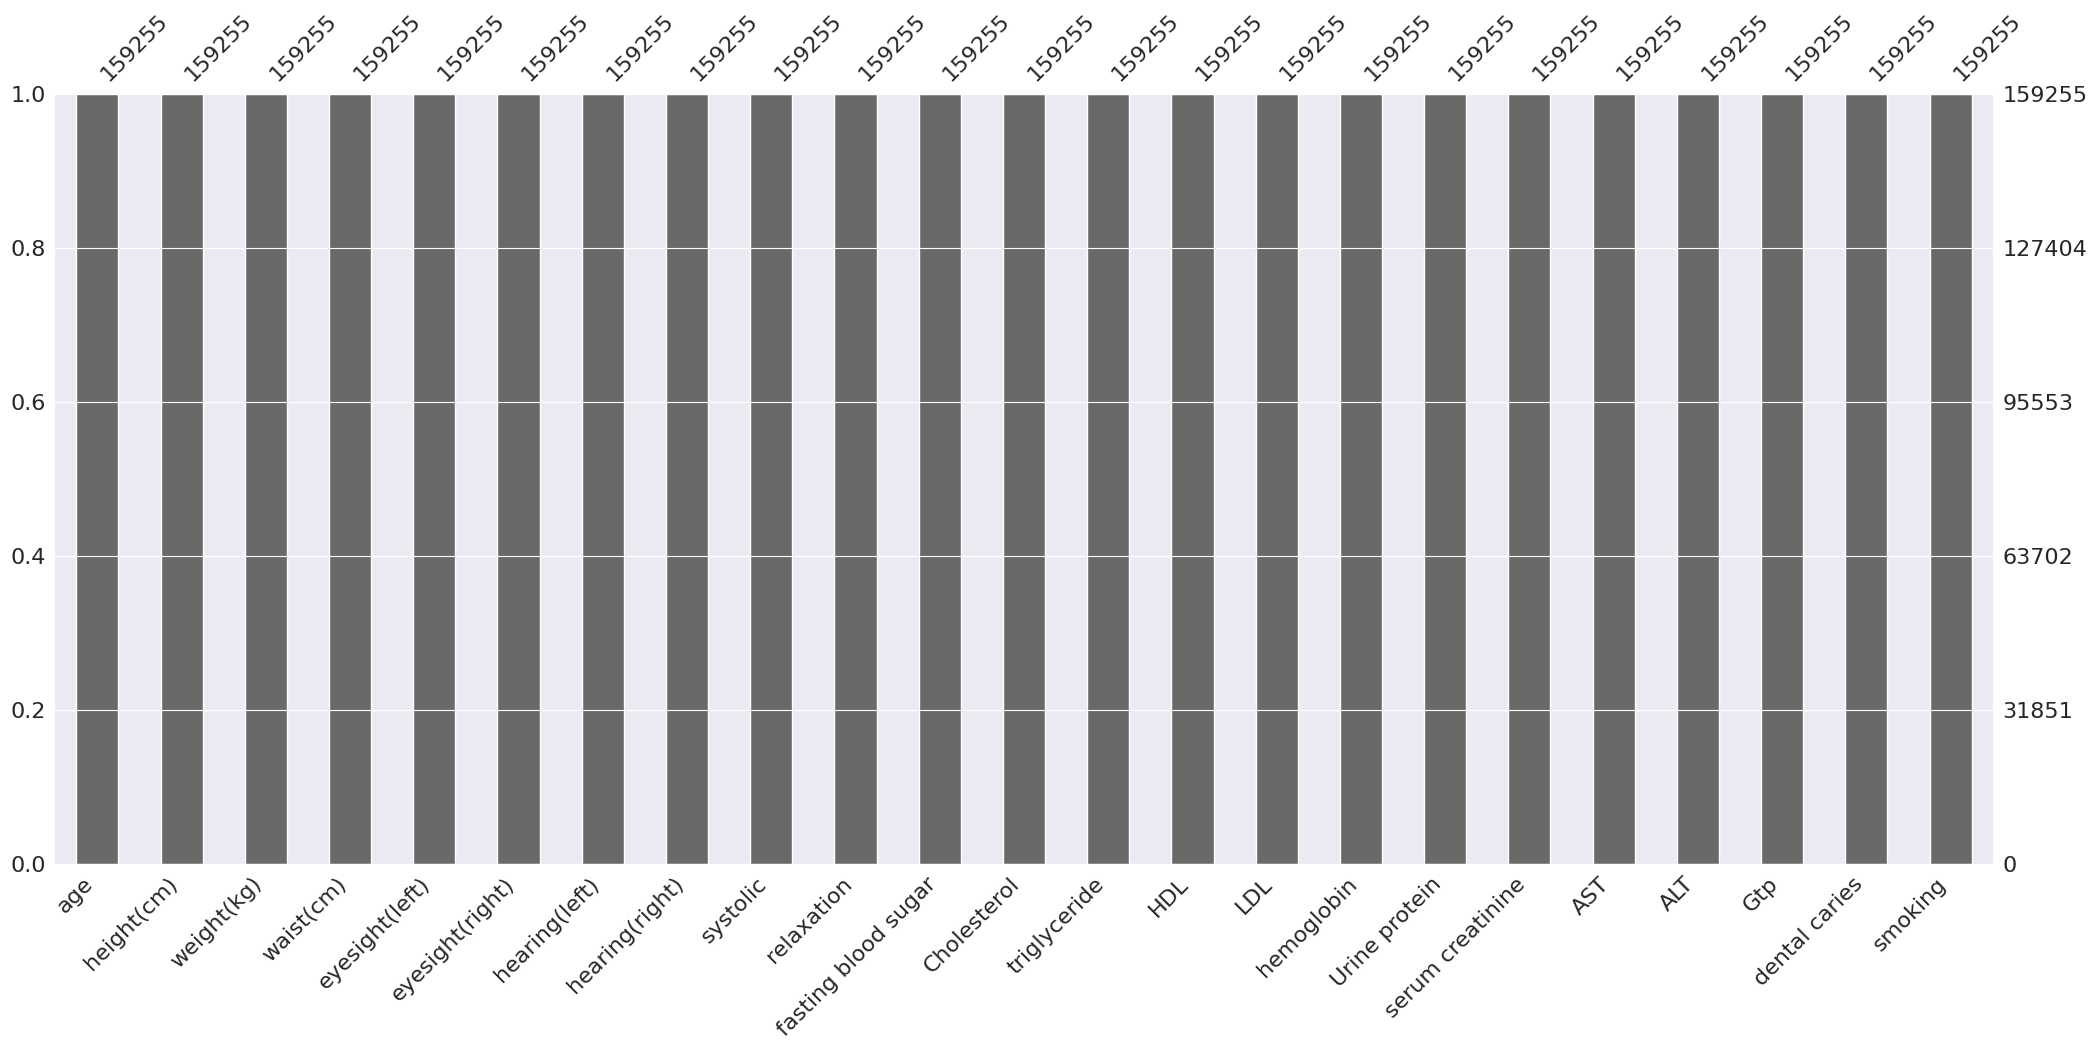

In [78]:
import missingno as msno
msno.bar(df=data[1:])

Zbiór danych jest pełny, nie posiada brakujących wartości.

## Wizualizacja danych

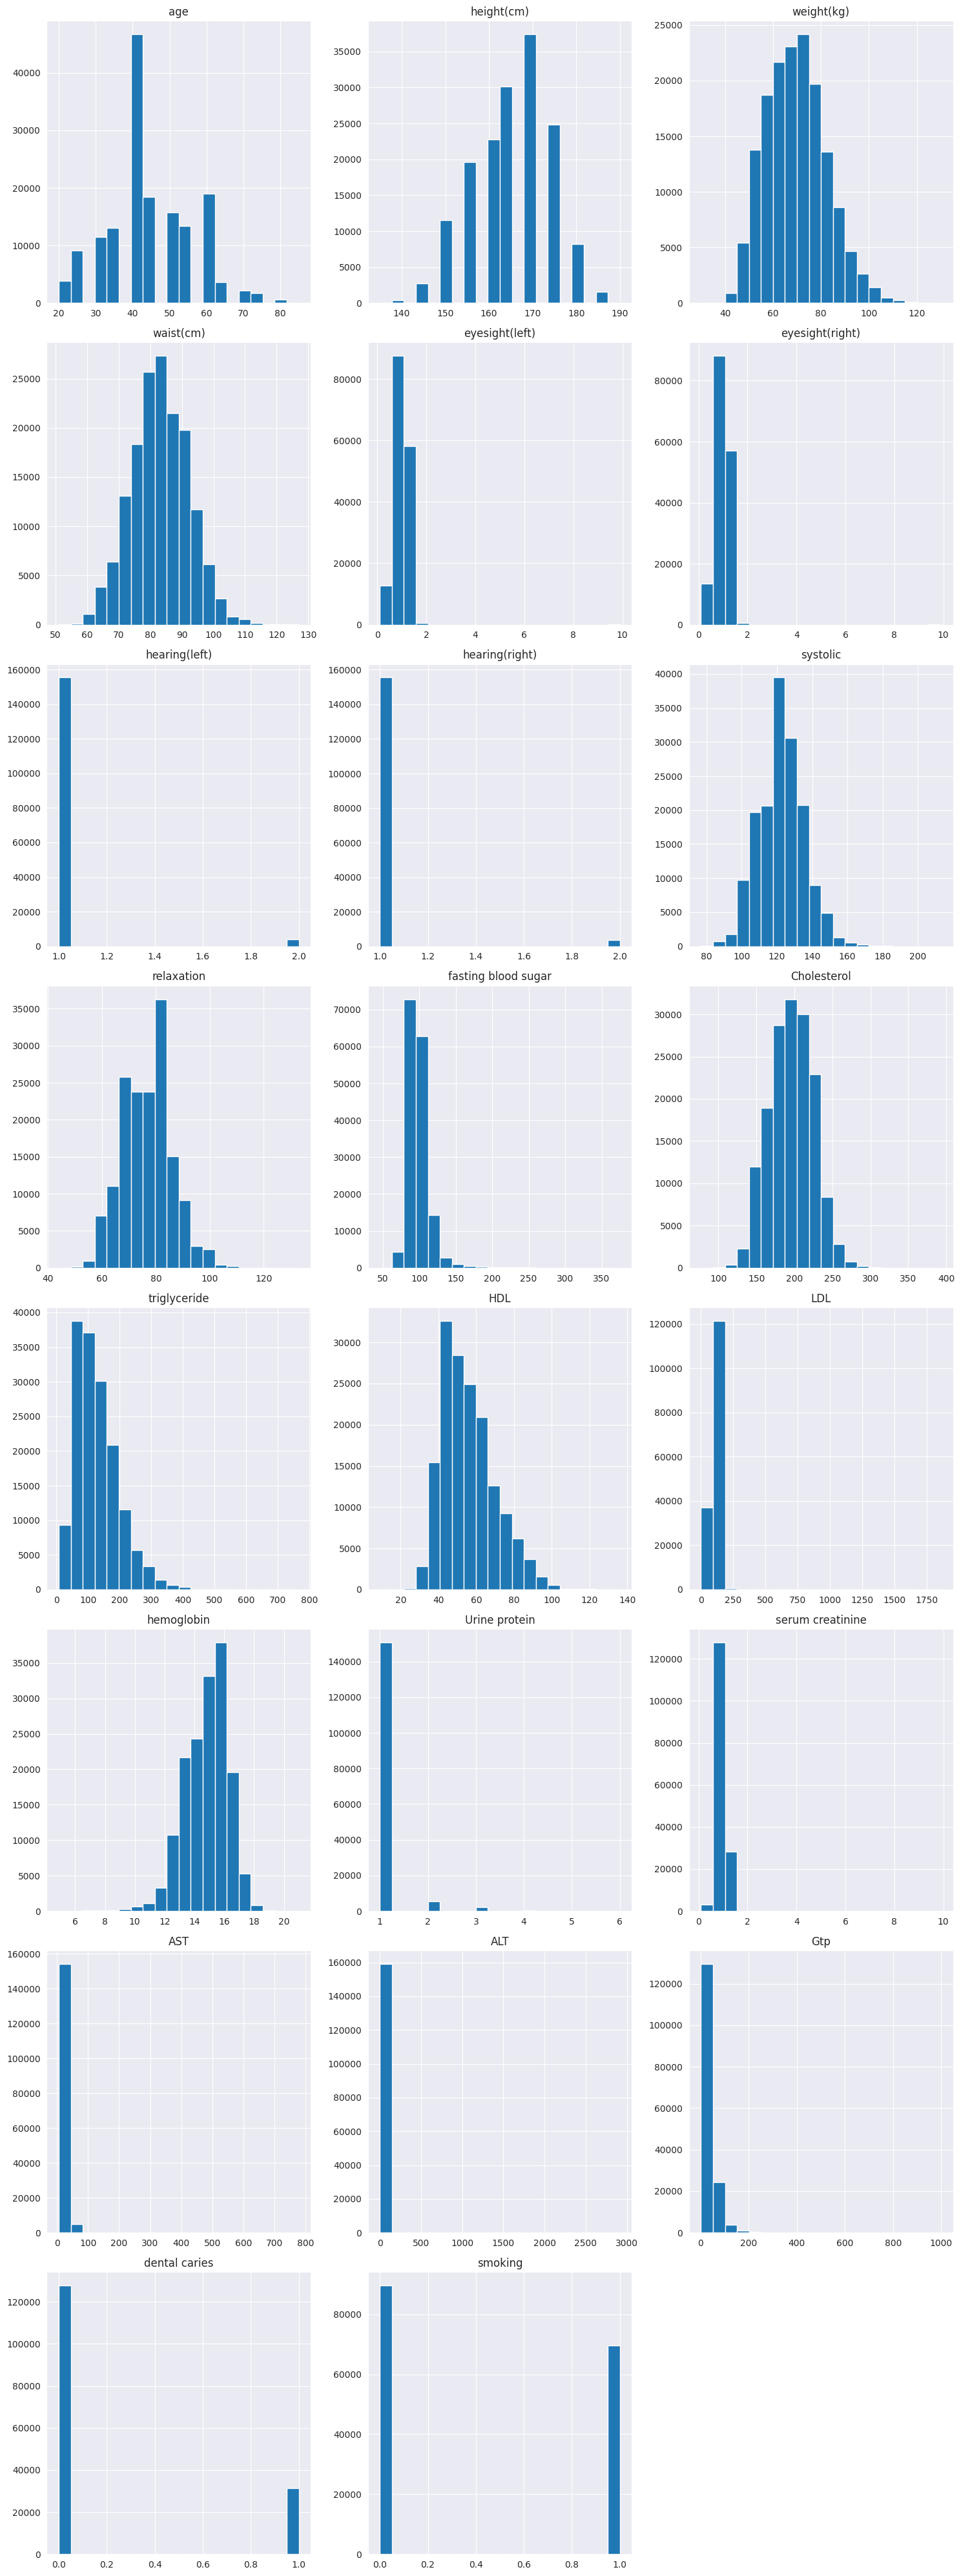

In [79]:
num_cols = 3
num_rows = (len(data.columns) + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten() if num_rows > 1 else [axes]

for i, col in enumerate(data.columns):
    data[col].hist(ax=axes[i], bins=20)
    axes[i].set_title(col)

# Usuń puste subplots, jeśli liczba atrybutów nie jest równa num_rows * num_cols
for j in range(len(data.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [80]:
target_distribution = data.smoking.value_counts(normalize=True)
target_distribution

smoking
0    0.562635
1    0.437365
Name: proportion, dtype: float64

Klasyfikator przewidujący zawsze klasę większościową osiągnąłby accuracy na poziomie 0.56.

## Wykres korelacji między różnymi cechami

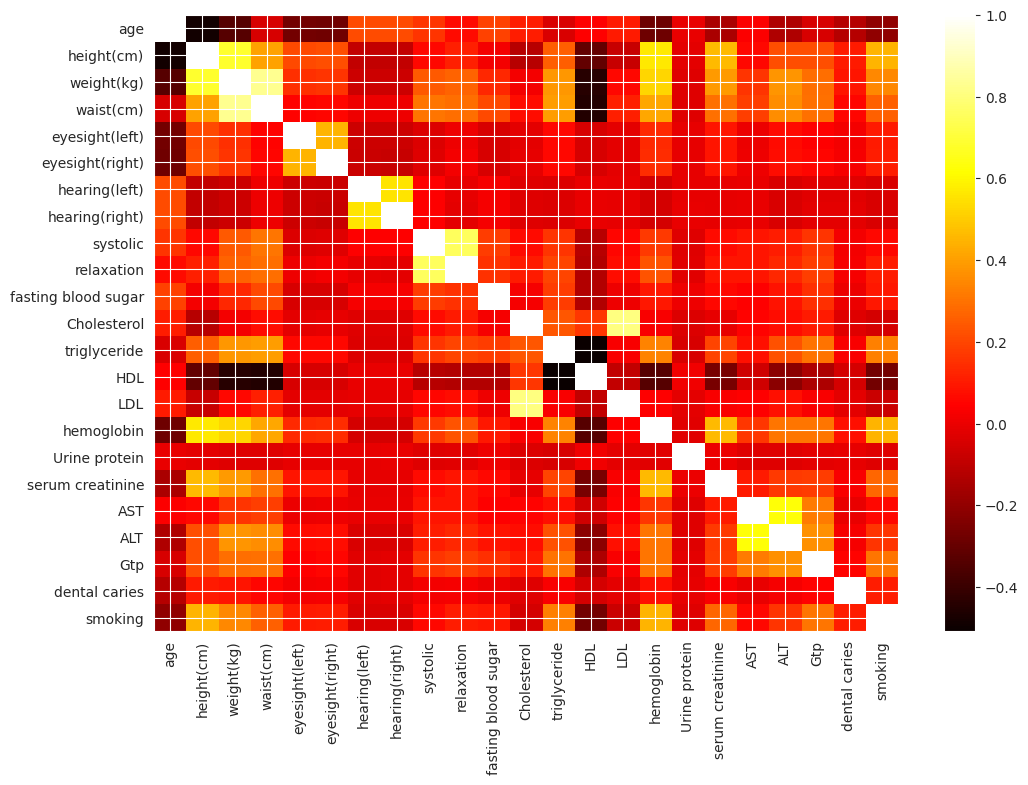

In [81]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='hot', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

Widać, że atrybuty: height, weight, waist, triglyceride, hemoglobin są dość wysoko skorelowane z atrybutem smoking. Atrybut HDL również posaida dość wysoką korelację - ujemną. Może to wskazywać na potencjalne związki między tymi danymi. 

# Przykład modelu

In [82]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [83]:
target_variable = 'smoking'

In [84]:
X = data.drop(target_variable, axis=1)
Y = data[target_variable]
X.shape, Y.shape

((159256, 22), (159256,))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [86]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [87]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4
}

In [88]:
num_round = 100
model = xgb.train(params, dtrain, num_round)

In [89]:
y_pred = model.predict(dtest)

In [90]:
y_pred_labels = np.array([1 if pred > 0.5 else 0 for pred in y_pred])

In [91]:
accuracy = accuracy_score(y_test, y_pred_labels)
gini_score = 2 * roc_auc_score(y_test, y_pred) - 1
print(f'Accuracy: {accuracy:.2}')
print(f'Gini score: {gini_score:.2}')

Accuracy: 0.78
Gini score: 0.72


Nasz model ma skuteczność ok 78%. W celu bardziej wiarygodnego porównania ze skutecznoscią na zbiorze danych porto-seguro obliczyliśmy również współczynnik Giniego. Jest osiągamy lepszy wynik niż klasyfikator przewidujący zawsze klasę najszęściej występującą, nie jest on jednak zbyt dobry, dlatego w kolejnym etapie projektu postaramy się go poprawić poprzez optymalizację parametrów modelu xgboost oraz selekcję odpowiednich atrybutów.